In [4]:
pip install tensorflow

In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
data=pd.read_csv("D:\\assignments\\assignment 16 Neural Networks\\forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [12]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [13]:
data1=data.copy()
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [16]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [17]:
from sklearn import preprocessing

In [18]:
data1=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [19]:
cor=data1.corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

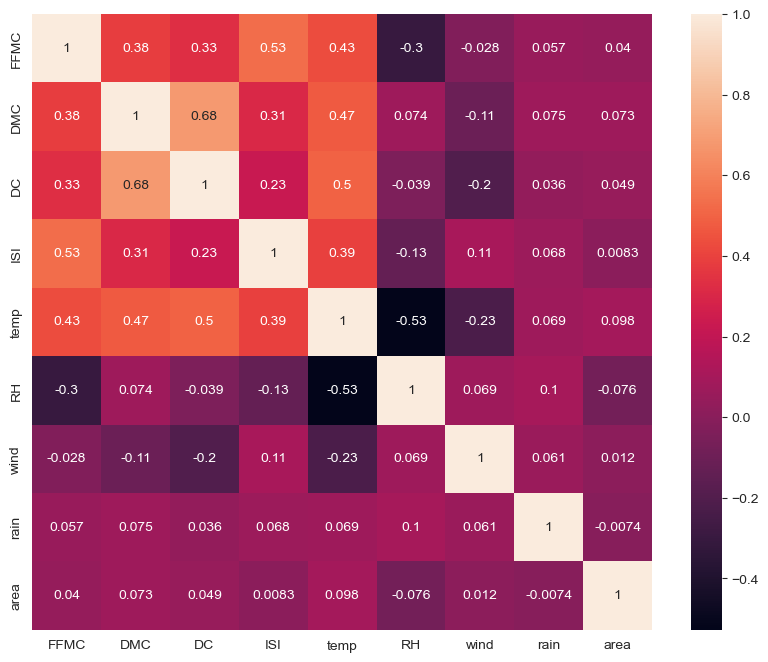

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

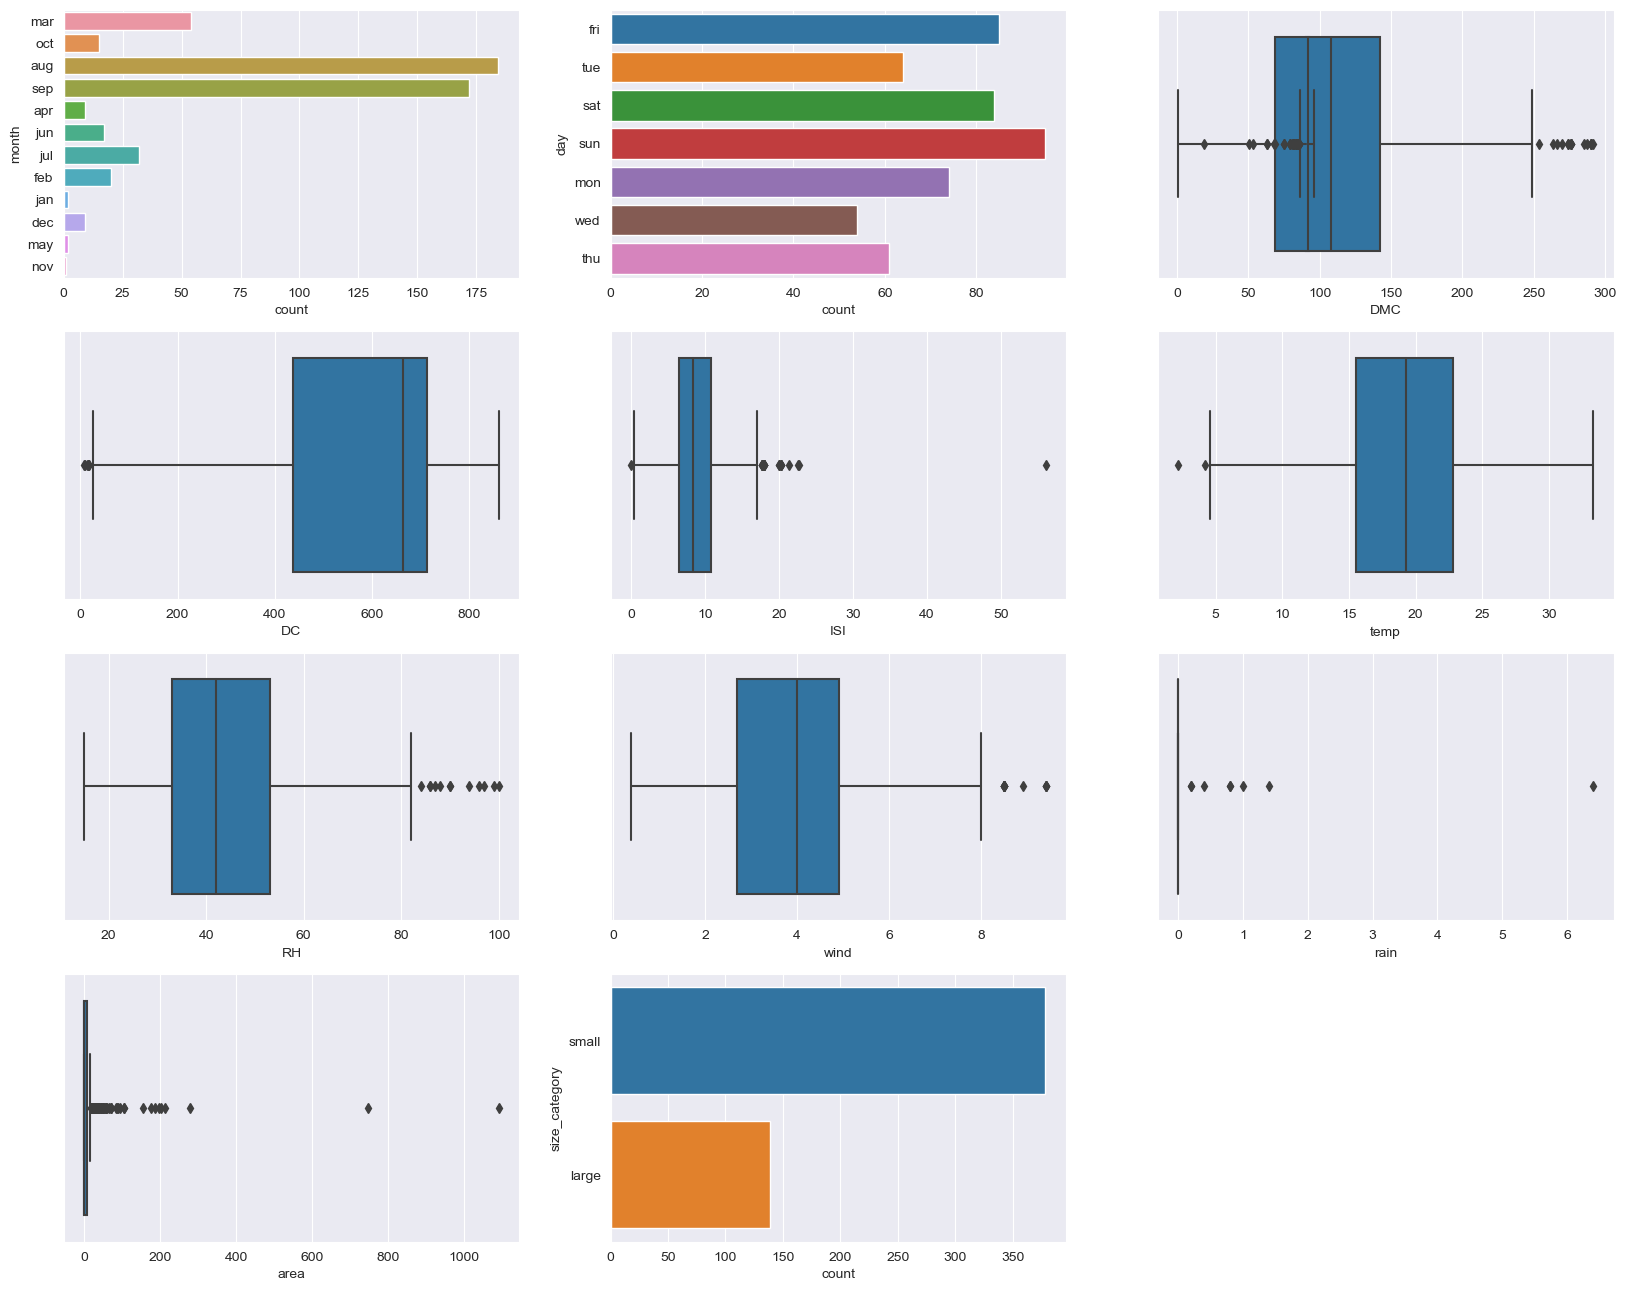

In [21]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data1, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=data1["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=data1["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=data1["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=data1["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=data1["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=data1["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=data1["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=data1["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=data1["area"])]

[plt.subplot(4,3,11), sns.countplot(data=data1, y='size_category')];

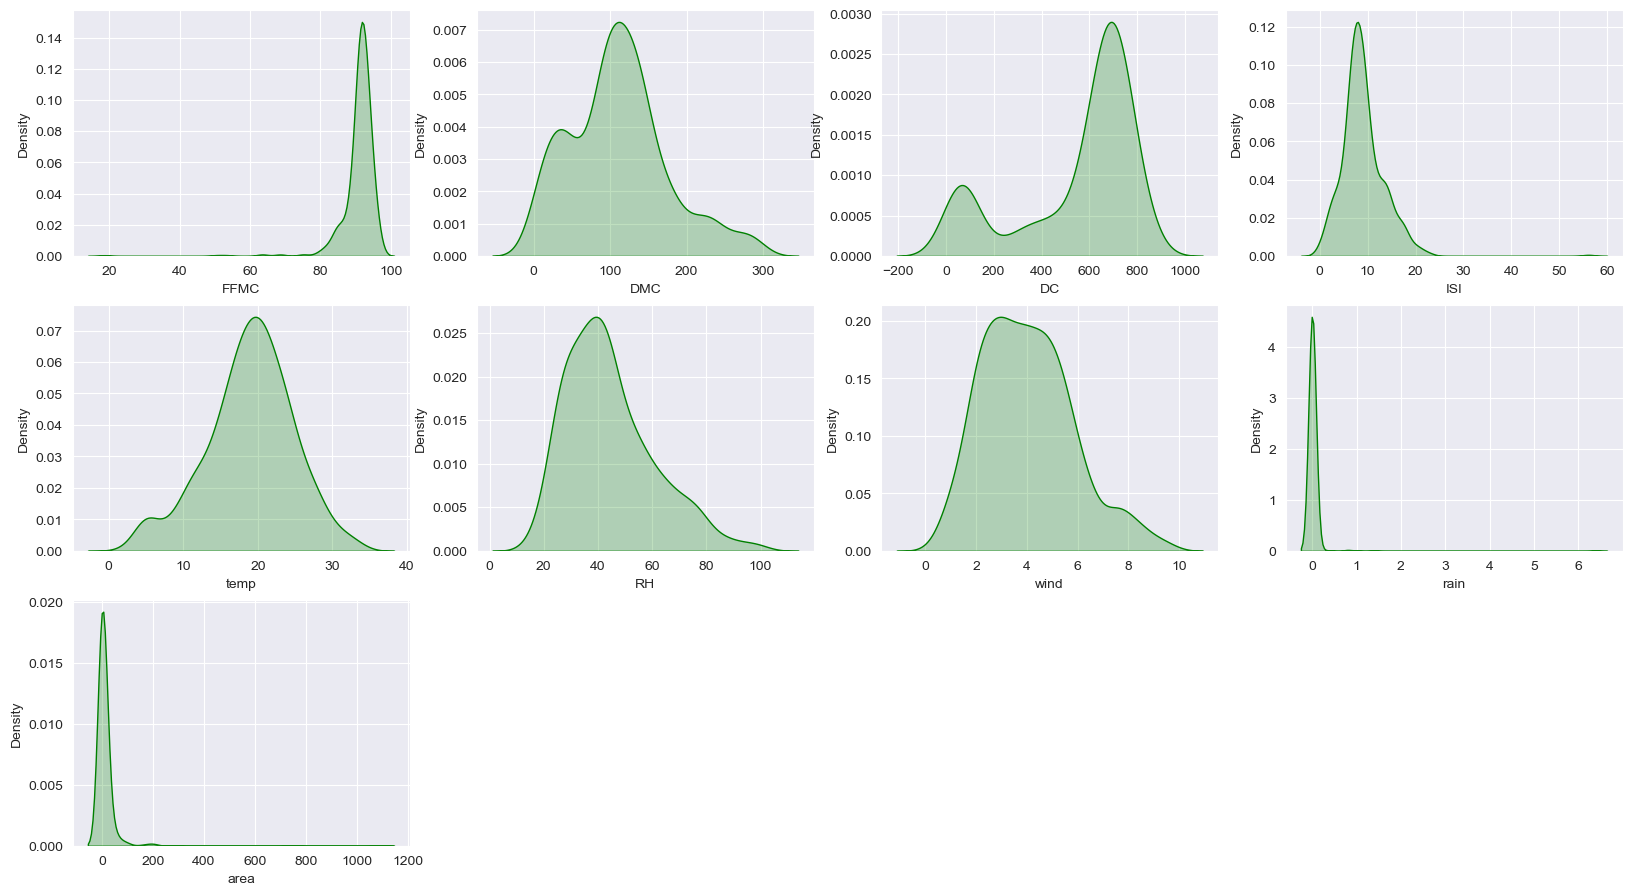

In [22]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

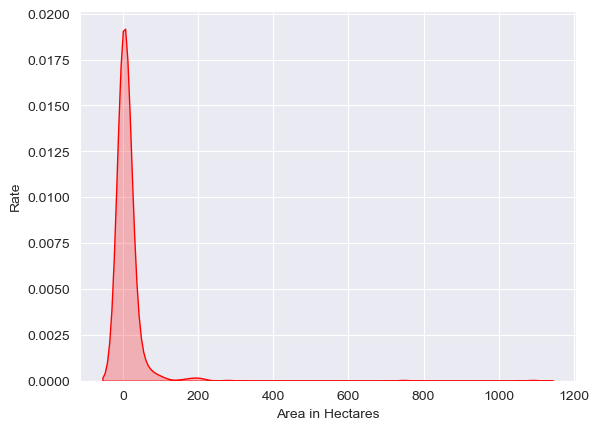

In [23]:
sns.kdeplot(data1['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

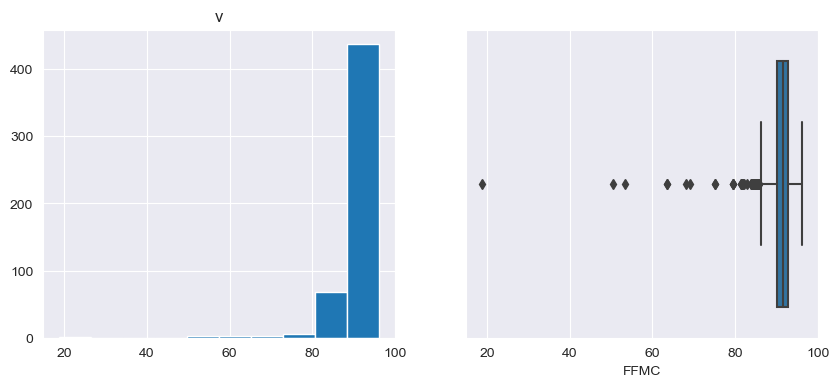

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

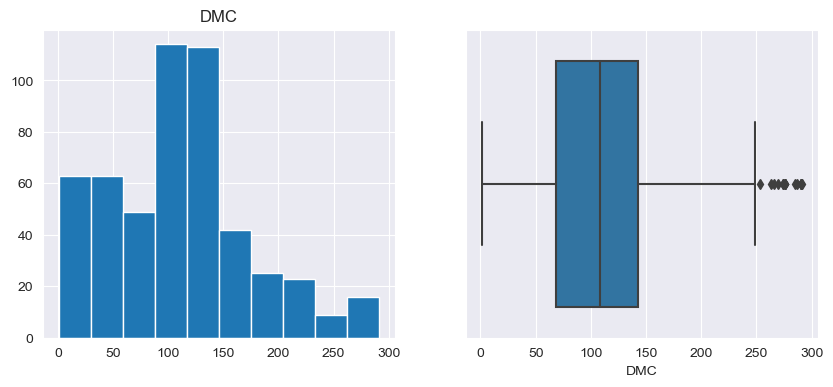

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]

([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

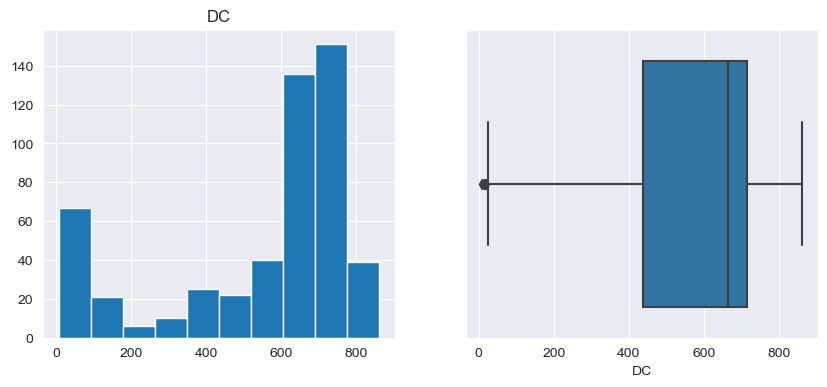

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

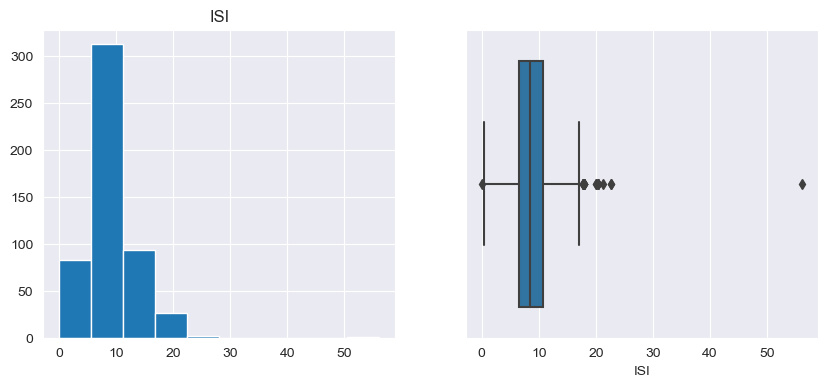

In [27]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

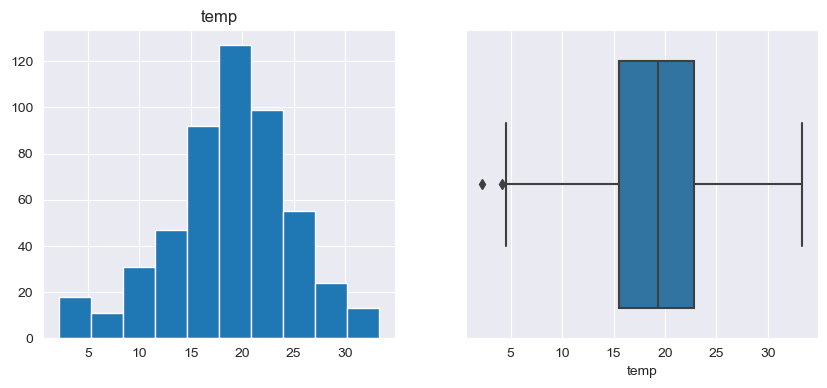

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

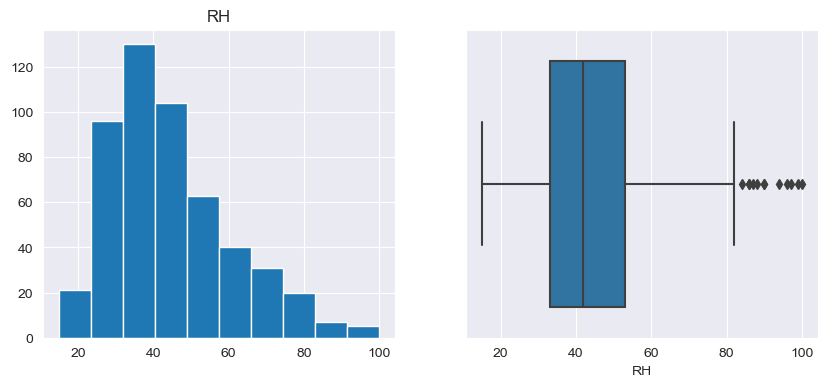

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

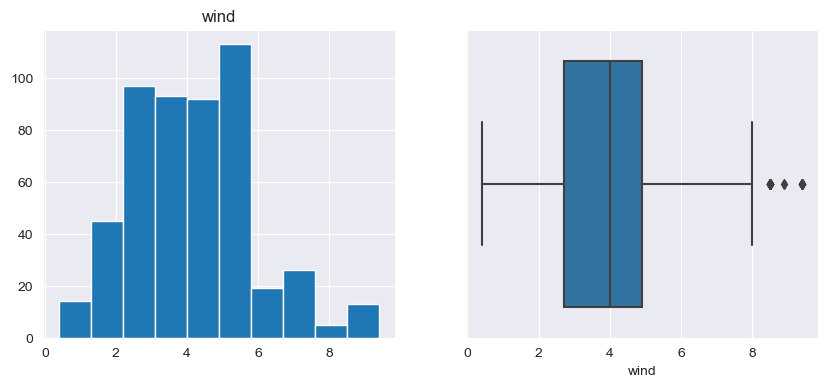

In [30]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

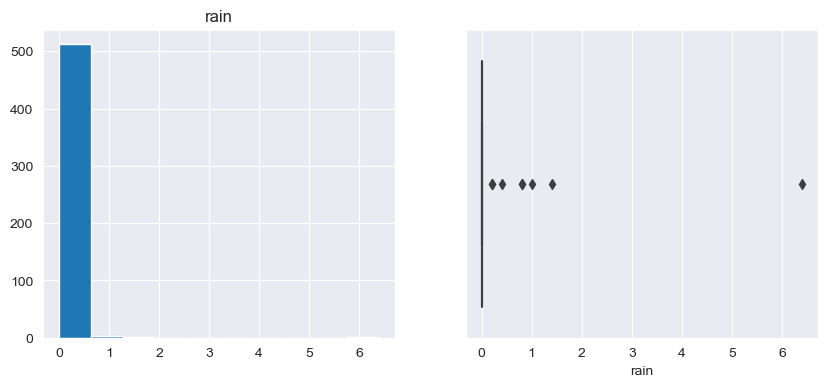

In [31]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]

([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

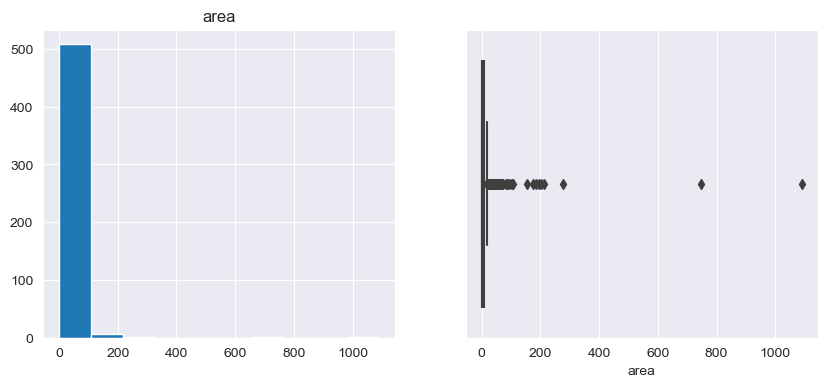

In [32]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]

In [33]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [34]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
x = data.iloc[:,2:11]
y = data['size_category']

In [36]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [38]:
seed = 9
np.random.seed(seed)

In [40]:
model = Sequential() 
model.add(Dense(12, input_dim=9,  activation='relu')) 
model.add(Dense(8,  activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [42]:
fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 7s 22ms/step - loss: 2.9403 - accuracy: 0.7110 - val_loss: 5.3343 - val_accuracy: 0.5497
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 2.1851 - accuracy: 0.6965 - val_loss: 5.1109 - val_accuracy: 0.5146
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 1.8937 - accuracy: 0.6965 - val_loss: 6.0050 - val_accuracy: 0.4912
Epoch 4/250
35/35 [==============================] - 0s 7ms/step - loss: 1.5102 - accuracy: 0.7341 - val_loss: 4.6444 - val_accuracy: 0.5029
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: 1.3737 - accuracy: 0.7197 - val_loss: 2.9793 - val_accuracy: 0.5906
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 1.2450 - accuracy: 0.7457 - val_loss: 4.4510 - val_accuracy: 0.4971
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 1.1346 - accuracy: 0.7139 - val_loss: 2.0927 - val_accuracy: 0.6199
Epoch 8/250


In [43]:
score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9768
accuracy: 97.68%


In [44]:
model.metrics_names, score 

(['loss', 'accuracy'], [0.05559935420751572, 0.9767891764640808])

In [45]:
fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
fil_model.history['accuracy']

[0.7109826803207397,
 0.6965317726135254,
 0.6965317726135254,
 0.7341040372848511,
 0.7196531891822815,
 0.7456647157669067,
 0.7138728499412537,
 0.7514451146125793,
 0.7687861323356628,
 0.8005780577659607,
 0.8265895843505859,
 0.8352600932121277,
 0.8641618490219116,
 0.8612716794013977,
 0.8757225275039673,
 0.910404622554779,
 0.9075144529342651,
 0.9595375657081604,
 0.9479768872261047,
 0.9682080745697021,
 0.9710982441902161,
 0.9537572264671326,
 0.9682080745697021,
 0.9682080745697021,
 0.9826589822769165,
 0.9595375657081604,
 0.9682080745697021,
 0.9624277353286743,
 0.97398841381073,
 0.97398841381073,
 0.9450867176055908,
 0.9682080745697021,
 0.9797688126564026,
 0.97398841381073,
 0.97398841381073,
 0.97398841381073,
 0.9595375657081604,
 0.9508670568466187,
 0.9913294911384583,
 0.9855491518974304,
 0.9710982441902161,
 0.9826589822769165,
 0.9653179049491882,
 0.9797688126564026,
 0.9884393215179443,
 0.9855491518974304,
 0.9855491518974304,
 0.9826589822769165,
 0.

In [48]:
fil_model.history['val_accuracy']

[0.5497075915336609,
 0.5146198868751526,
 0.4912280738353729,
 0.5029239654541016,
 0.5906432867050171,
 0.49707603454589844,
 0.6198830604553223,
 0.5555555820465088,
 0.5906432867050171,
 0.6023392081260681,
 0.5789473652839661,
 0.7719298005104065,
 0.6783625483512878,
 0.8245614171028137,
 0.8128654956817627,
 0.8538011908531189,
 0.7719298005104065,
 0.7251461744308472,
 0.7017543911933899,
 0.8362573385238647,
 0.6900584697723389,
 0.8362573385238647,
 0.8362573385238647,
 0.8304093480110168,
 0.8304093480110168,
 0.8421052694320679,
 0.8362573385238647,
 0.847953200340271,
 0.8538011908531189,
 0.847953200340271,
 0.847953200340271,
 0.8538011908531189,
 0.871345043182373,
 0.8654970526695251,
 0.8654970526695251,
 0.8538011908531189,
 0.859649121761322,
 0.871345043182373,
 0.8947368264198303,
 0.8947368264198303,
 0.8947368264198303,
 0.8888888955116272,
 0.8654970526695251,
 0.8888888955116272,
 0.9122806787490845,
 0.9122806787490845,
 0.9064327478408813,
 0.906432747840881

In [49]:
fil_model.history['loss']

[2.940300464630127,
 2.1850719451904297,
 1.8936649560928345,
 1.5101983547210693,
 1.373746395111084,
 1.2450357675552368,
 1.134569764137268,
 0.958372950553894,
 0.7595100402832031,
 0.6239137053489685,
 0.5257201194763184,
 0.5240489840507507,
 0.43417903780937195,
 0.3800998628139496,
 0.3310423195362091,
 0.24398639798164368,
 0.22919417917728424,
 0.1414993554353714,
 0.14025190472602844,
 0.13332036137580872,
 0.09117311984300613,
 0.148840069770813,
 0.09720014780759811,
 0.08665473759174347,
 0.07893915474414825,
 0.10287369787693024,
 0.1118810772895813,
 0.09293267130851746,
 0.06452014297246933,
 0.09214865416288376,
 0.12090430408716202,
 0.09060543775558472,
 0.07143522053956985,
 0.07389412820339203,
 0.08044110983610153,
 0.06366560608148575,
 0.128777414560318,
 0.12092112004756927,
 0.049415770918130875,
 0.055023591965436935,
 0.06765681505203247,
 0.05299459397792816,
 0.07789371907711029,
 0.05752004683017731,
 0.047013431787490845,
 0.05263282731175423,
 0.053530

In [50]:
fil_model.history['val_loss']

[5.334303379058838,
 5.110912799835205,
 6.004997253417969,
 4.644421100616455,
 2.9792518615722656,
 4.450990200042725,
 2.0926852226257324,
 2.562237024307251,
 1.815845012664795,
 1.479853630065918,
 1.5585395097732544,
 0.7830270528793335,
 0.7921997308731079,
 0.5593088865280151,
 0.48522287607192993,
 0.4527120292186737,
 0.4779474437236786,
 0.6588941216468811,
 0.8552020192146301,
 0.45417308807373047,
 0.9646836519241333,
 0.5063971877098083,
 0.49350452423095703,
 0.3626460134983063,
 0.3581532835960388,
 0.31464213132858276,
 0.29940366744995117,
 0.2826646864414215,
 0.3750510513782501,
 0.33745941519737244,
 0.36938008666038513,
 0.24664752185344696,
 0.27293121814727783,
 0.2335931807756424,
 0.2339426726102829,
 0.3261379301548004,
 0.3395899832248688,
 0.27102208137512207,
 0.20548942685127258,
 0.20713788270950317,
 0.19754360616207123,
 0.22449304163455963,
 0.24903936684131622,
 0.22263740003108978,
 0.19274704158306122,
 0.1849231868982315,
 0.16140548884868622,
 0.

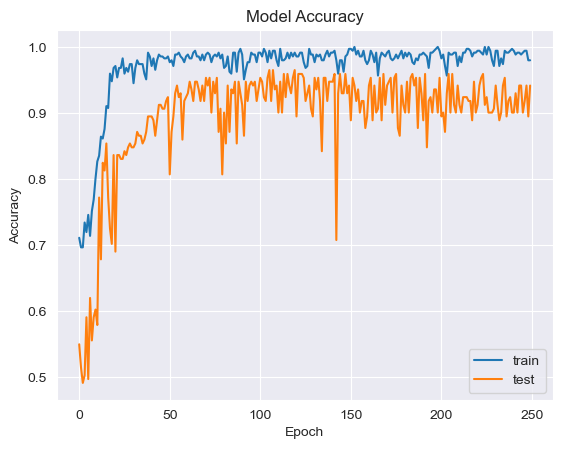

In [51]:
plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

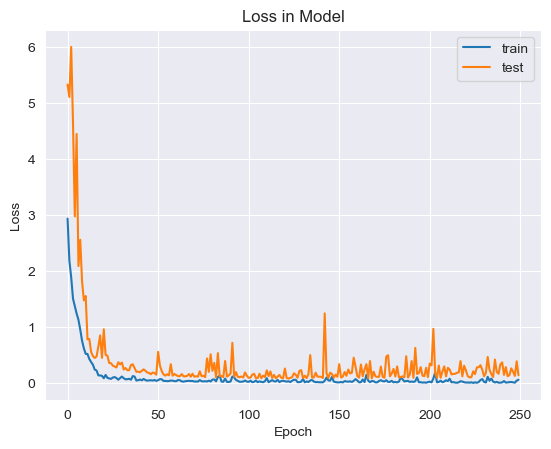

In [52]:
plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [53]:
predictions = model.predict(x)

17/17 [==============================] - 3s 2ms/step


In [54]:
seed2 = 9
np.random.seed(seed2)

In [55]:
model2 = Sequential() 
model2.add(Dense(14, input_dim=9,  activation='linear')) 
model2.add(Dense(9,  activation='linear')) 
model2.add(Dense(1, activation='sigmoid'))

In [56]:
model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2

In [57]:
fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 3s 19ms/step - loss: 110.3176 - accuracy: 0.2399 - val_loss: 113.0371 - val_accuracy: 0.3158
Epoch 2/200
35/35 [==============================] - 0s 7ms/step - loss: 109.8031 - accuracy: 0.2399 - val_loss: 112.5117 - val_accuracy: 0.3158
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 109.2764 - accuracy: 0.2399 - val_loss: 111.9681 - val_accuracy: 0.3158
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 108.7340 - accuracy: 0.2399 - val_loss: 111.4144 - val_accuracy: 0.3158
Epoch 5/200
35/35 [==============================] - 0s 7ms/step - loss: 108.1816 - accuracy: 0.2399 - val_loss: 110.8512 - val_accuracy: 0.3158
Epoch 6/200
35/35 [==============================] - 0s 7ms/step - loss: 107.6196 - accuracy: 0.2399 - val_loss: 110.2789 - val_accuracy: 0.3158
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 107.0494 - accuracy: 0.2399 - val_loss: 109.6943 - val_a

In [58]:
score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 12.0974 - accuracy: 0.4333
accuracy: 43.33%


In [59]:
model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [12.097426414489746, 0.43326884508132935],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [60]:
fil_model2.history['accuracy']

[0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914270401,
 0.2398843914

In [61]:
fil_model2.history['val_accuracy']

[0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.31578946113586426,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.30994153022766113,
 0.3099415

In [62]:
fil_model.history['loss']

[2.940300464630127,
 2.1850719451904297,
 1.8936649560928345,
 1.5101983547210693,
 1.373746395111084,
 1.2450357675552368,
 1.134569764137268,
 0.958372950553894,
 0.7595100402832031,
 0.6239137053489685,
 0.5257201194763184,
 0.5240489840507507,
 0.43417903780937195,
 0.3800998628139496,
 0.3310423195362091,
 0.24398639798164368,
 0.22919417917728424,
 0.1414993554353714,
 0.14025190472602844,
 0.13332036137580872,
 0.09117311984300613,
 0.148840069770813,
 0.09720014780759811,
 0.08665473759174347,
 0.07893915474414825,
 0.10287369787693024,
 0.1118810772895813,
 0.09293267130851746,
 0.06452014297246933,
 0.09214865416288376,
 0.12090430408716202,
 0.09060543775558472,
 0.07143522053956985,
 0.07389412820339203,
 0.08044110983610153,
 0.06366560608148575,
 0.128777414560318,
 0.12092112004756927,
 0.049415770918130875,
 0.055023591965436935,
 0.06765681505203247,
 0.05299459397792816,
 0.07789371907711029,
 0.05752004683017731,
 0.047013431787490845,
 0.05263282731175423,
 0.053530

In [63]:
fil_model.history['val_loss']

[5.334303379058838,
 5.110912799835205,
 6.004997253417969,
 4.644421100616455,
 2.9792518615722656,
 4.450990200042725,
 2.0926852226257324,
 2.562237024307251,
 1.815845012664795,
 1.479853630065918,
 1.5585395097732544,
 0.7830270528793335,
 0.7921997308731079,
 0.5593088865280151,
 0.48522287607192993,
 0.4527120292186737,
 0.4779474437236786,
 0.6588941216468811,
 0.8552020192146301,
 0.45417308807373047,
 0.9646836519241333,
 0.5063971877098083,
 0.49350452423095703,
 0.3626460134983063,
 0.3581532835960388,
 0.31464213132858276,
 0.29940366744995117,
 0.2826646864414215,
 0.3750510513782501,
 0.33745941519737244,
 0.36938008666038513,
 0.24664752185344696,
 0.27293121814727783,
 0.2335931807756424,
 0.2339426726102829,
 0.3261379301548004,
 0.3395899832248688,
 0.27102208137512207,
 0.20548942685127258,
 0.20713788270950317,
 0.19754360616207123,
 0.22449304163455963,
 0.24903936684131622,
 0.22263740003108978,
 0.19274704158306122,
 0.1849231868982315,
 0.16140548884868622,
 0.

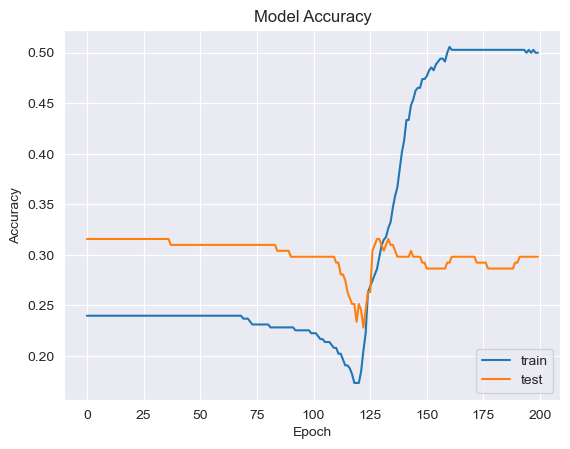

In [64]:
plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

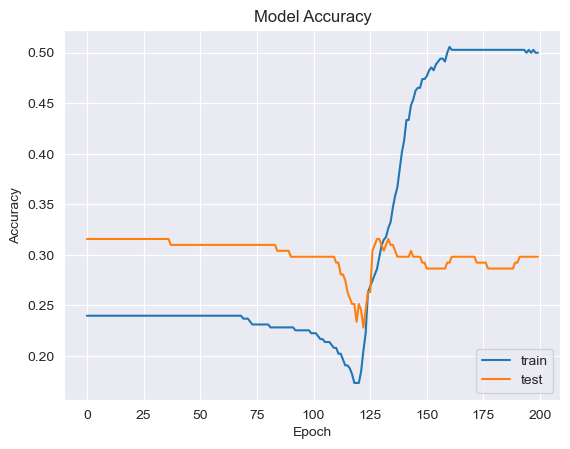

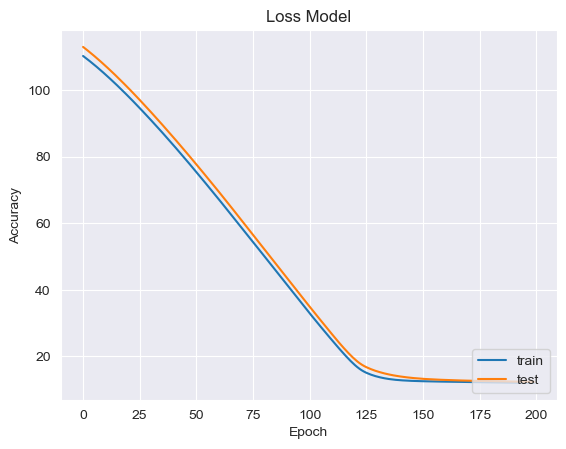

In [66]:
plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [67]:
seed3 = 10
np.random.seed(seed3)

In [68]:
model3 = Sequential() 
model3.add(Dense(14, input_dim=9,  activation='relu')) 
model3.add(Dense(9,  activation='sigmoid')) 
model3.add(Dense(1, activation='tanh')) 

In [69]:
model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [70]:
fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 2s 31ms/step - loss: 1.1511 - accuracy: 0.3468 - val_loss: 1.0336 - val_accuracy: 0.3977
Epoch 2/300
24/24 [==============================] - 0s 9ms/step - loss: 1.0327 - accuracy: 0.3613 - val_loss: 0.9500 - val_accuracy: 0.4152
Epoch 3/300
24/24 [==============================] - 0s 8ms/step - loss: 0.9783 - accuracy: 0.3613 - val_loss: 0.8877 - val_accuracy: 0.4327
Epoch 4/300
24/24 [==============================] - 0s 10ms/step - loss: 0.9415 - accuracy: 0.3613 - val_loss: 0.8181 - val_accuracy: 0.4854
Epoch 5/300
24/24 [==============================] - 0s 8ms/step - loss: 0.9143 - accuracy: 0.3671 - val_loss: 0.7816 - val_accuracy: 0.5029
Epoch 6/300
24/24 [==============================] - 0s 7ms/step - loss: 0.8908 - accuracy: 0.3699 - val_loss: 0.7506 - val_accuracy: 0.5263
Epoch 7/300
24/24 [==============================] - 0s 6ms/step - loss: 0.8708 - accuracy: 0.3699 - val_loss: 0.7211 - val_accuracy: 0.5380
Epoch 8/300

In [71]:
score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8356
accuracy: 83.56%


In [72]:
model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.4588873088359833, 0.8355899453163147],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

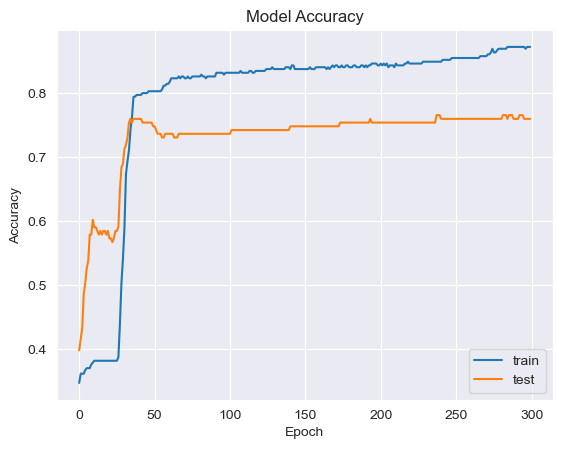

In [73]:
plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

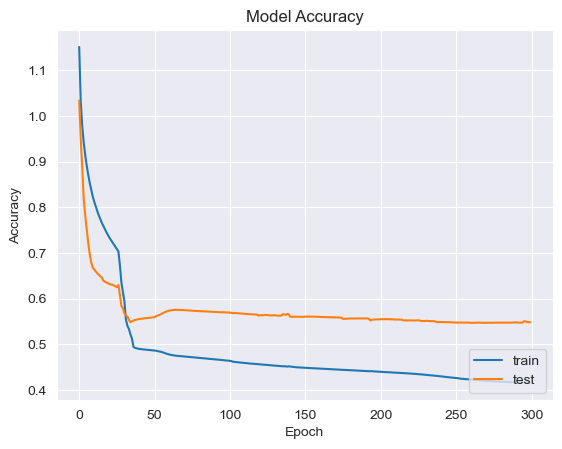

In [74]:
plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()